In [30]:
import numpy as np
import keras
import pandas
from keras_tqdm import TQDMNotebookCallback
from sklearn import preprocessing

data = np.array(pandas.read_csv("~/trainingdata.csv", header=0))

print(data.shape)


(72, 7)


In [31]:
from sympy import *
init_printing(use_latex=True)

import matplotlib.pyplot as plt
%matplotlib inline

X = data[:,0:6]
X = preprocessing.scale(X)
print(X.shape)
display(X)

labels = data[:,6]
print(labels.shape)
display(labels)

Y = keras.utils.to_categorical(labels, len(np.unique(labels)))

(72, 6)


array([[-1.0233435 , -0.37716553, -0.34893403,  0.32330268, -0.05200758,
         0.37994185],
       [-0.7046986 , -0.45616456,  0.97833202, -0.01720953, -0.93794118,
        -0.68779499],
       [-0.66929361, -1.40415296,  1.04153517,  1.00432709, -1.61125071,
        -0.80643241],
       [-0.59848363, -1.32515393,  1.48395719,  0.89082302, -1.18600258,
        -1.6368944 ],
       [-0.74010359, -0.29816649, -0.53854347,  0.32330268, -0.09925737,
         0.6172167 ],
       [ 1.48155945,  0.17582771, -0.58594583,  1.91235964,  0.9717379 ,
         1.12142576],
       [ 1.56122067,  0.41282481, -0.60174661,  1.23133522,  1.18829945,
        -0.80643241],
       [-0.77550858,  0.33382578, -0.79135605, -0.24421767, -0.00475779,
        -0.56915756],
       [ 1.27798076,  0.80781998, -0.55961118, -0.4712258 ,  1.12923721,
         1.09176641],
       [-0.66929361, -0.77216069,  0.67811708, -0.4712258 , -1.56400092,
        -0.68779499],
       [ 1.45500571,  1.28181418,  0.28309742, -1.

(72,)


array([0., 1., 1., 1., 0., 2., 2., 0., 2., 1., 2., 1., 2., 2., 2., 1., 1.,
       2., 0., 1., 2., 0., 1., 1., 0., 2., 1., 2., 1., 0., 0., 1., 2., 0.,
       0., 0., 1., 0., 2., 2., 0., 0., 0., 2., 1., 0., 0., 2., 0., 0., 2.,
       2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 0., 0., 1., 2., 1., 1., 0.,
       0., 2., 0., 2.])

In [ ]:
input_size = X.shape[1]
output_size = Y.shape[1]
display(X.shape[1])

In [27]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(100,input_dim=6,activation='relu', bias_initializer=keras.initializers.Constant(value=0.01)))
model.add(keras.layers.Dense(100,input_dim=6,activation='relu', bias_initializer=keras.initializers.Constant(value=0.01)))
model.add(keras.layers.Dense(100,input_dim=6,activation='relu', bias_initializer=keras.initializers.Constant(value=0.01)))

model.add(keras.layers.Dense(3,activation='softmax'))
#binary_crossentropy
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 303       
Total params: 21,203
Trainable params: 21,203
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history = model.fit(X, Y,
    batch_size=56, 
    epochs=100, 
    verbose=0,
    callbacks=[TQDMNotebookCallback()],
    validation_split = 0.25)


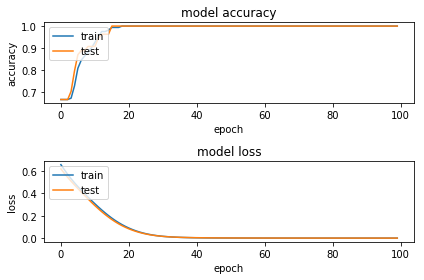

72/72 [==============================] - 0s 149us/step
Test loss: 0.0003522073837100632
Test accuracy: 1.0


In [29]:
plt.figure(1)

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])